# Projet d'Analyse des Données du Tour de France avec Techniques de Machine Learning

### Introduction
The Tour de France is one of the world's oldest and most prestigious cycling competitions. 
This project aims to analyze historical data from the Tour de France, including winners, stages and race results. 
We will use Machine Learning techniques to explore this data, 
identify trends and possibly predict certain future results.

### Project objectives
1. Analyze historical data of Tour de France winners.
2. Explore stage and results data for each rider.
3. Use Machine Learning techniques to predict specific results such as total time for a winner or number of stage wins.
4. Visualize data and results from Machine Learning models.

### Project stages

The project stages we'll be working on are as follows:
1. Data Import and Preparation
2. Exploratory Data Analysis (EDA)
3. Data Preparation for Machine Learning
4. Modeling and Prediction
5. Model Evaluation
6. Conclusion and Openings

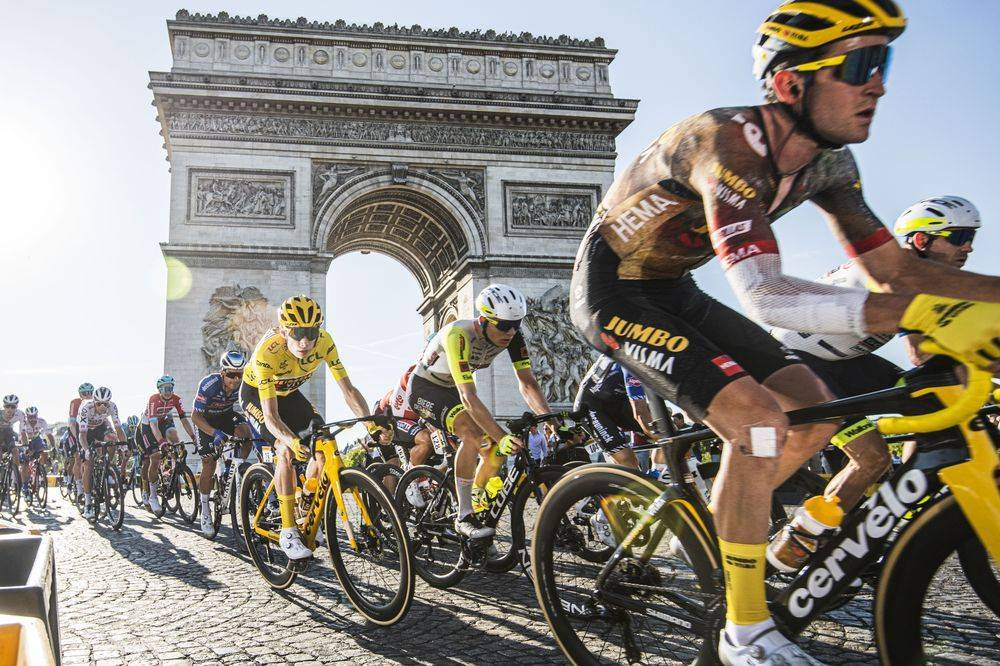

### 1. Import and Data Prep
# We will start by importing the data from the CSV files available on the GitHub repository.

# Import data

In [19]:
import pandas as pd
stage_data = pd.read_csv('Données sources/stage_data.csv')
tdf_stages = pd.read_csv('Données sources/tdf_stages.csv')
tdf_winners = pd.read_csv('Données sources/tdf_winners.csv')

# Display the first lines of each dataframe

In [28]:
print(stage_data.head())

   edition  year stage_results_id rank time             rider   age team  \
0        1  1903          stage-1    1  13S     Garin Maurice  32.0  NaN   
1        1  1903          stage-1    2  55S       Pagie Émile  32.0  NaN   
2        1  1903          stage-1    3  59S      Georget Léon  23.0  NaN   
3        1  1903          stage-1    4  48S  Augereau Fernand  20.0  NaN   
4        1  1903          stage-1    5  53S      Fischer Jean  36.0  NaN   

   points elapsed  bib_number  
0   100.0     13S         NaN  
1    70.0      8S         NaN  
2    50.0     12S         NaN  
3    40.0      1S         NaN  
4    32.0      6S         NaN  


In [29]:
print(tdf_stages.head())

  Stage        Date  Distance             Origin  \
0     1  2017-07-01      14.0         Düsseldorf   
1     2  2017-07-02     203.5         Düsseldorf   
2     3  2017-07-03     212.5           Verviers   
3     4  2017-07-04     207.5  Mondorf-les-Bains   
4     5  2017-07-05     160.5             Vittel   

                    Destination                   Type          Winner  \
0                    Düsseldorf  Individual time trial  Geraint Thomas   
1                         Liège             Flat stage   Marcel Kittel   
2                        Longwy  Medium mountain stage     Peter Sagan   
3                        Vittel             Flat stage   Arnaud Démare   
4  La Planche des Belles Filles  Medium mountain stage       Fabio Aru   

  Winner_Country  
0            GBR  
1            GER  
2            SVK  
3            FRA  
4            ITA  


In [30]:
print(tdf_winners.head())

   edition  start_date          winner_name     winner_team  distance  \
0        1  1903-07-01        Maurice Garin    La Française    2428.0   
1        2  1904-07-02         Henri Cornet           Conte    2428.0   
2        3  1905-07-09    Louis Trousselier  Peugeot–Wolber    2994.0   
3        4  1906-07-04         René Pottier  Peugeot–Wolber    4637.0   
4        5  1907-07-08  Lucien Petit-Breton  Peugeot–Wolber    4488.0   

   time_overall  time_margin  stage_wins  stages_led  height  weight  age  \
0     94.553889     2.989167           3           6    1.62    60.0   32   
1     96.098611     2.270556           1           3     NaN     NaN   19   
2           NaN          NaN           5          10     NaN     NaN   24   
3           NaN          NaN           5          12     NaN     NaN   27   
4           NaN          NaN           2           5     NaN     NaN   24   

         born        died             full_name                  nickname  \
0  1871-03-03  1957-0

# 2. Exploratory Data Analysis (EDA)

### EDA will enable us to better understand the structure of the data and detect missing values or anomalies.

### Analysis of Winners' Data
#### We're going to look at the characteristics of the Tour de France winners, such as their age, weight and height, and how these characteristics have changed over time.

          edition     distance  time_overall  time_margin  stage_wins  \
count  106.000000   106.000000     98.000000    98.000000  106.000000   
mean    53.500000  4212.064151    125.754983     0.267727    2.735849   
std     30.743563   704.284160     41.559391     0.476194    1.842885   
min      1.000000  2428.000000     82.086667     0.002222    0.000000   
25%     27.250000  3657.875000     92.601597     0.050833    1.000000   
50%     53.500000  4155.500000    115.026806     0.101667    2.000000   
75%     79.750000  4652.500000    142.678472     0.249931    4.000000   
max    106.000000  5745.000000    238.740278     2.989167    8.000000   

       stages_led     height     weight         age  
count  106.000000  66.000000  67.000000  106.000000  
mean    10.792453   1.778788  69.253731   27.716981  
std      5.307169   0.056989   6.592795    3.354470  
min      1.000000   1.610000  52.000000   19.000000  
25%      6.250000   1.740000  64.500000   26.000000  
50%     12.000000 

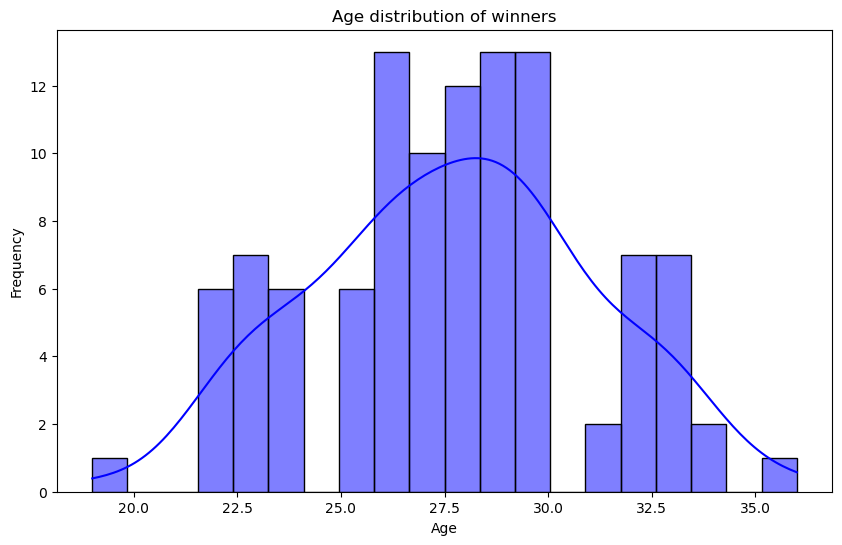

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(tdf_winners.describe())

# Age distribution of winners
plt.figure(figsize=(10, 6))
sns.histplot(tdf_winners['age'], bins=20, kde=True, color='blue')
plt.title('Age distribution of winners')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

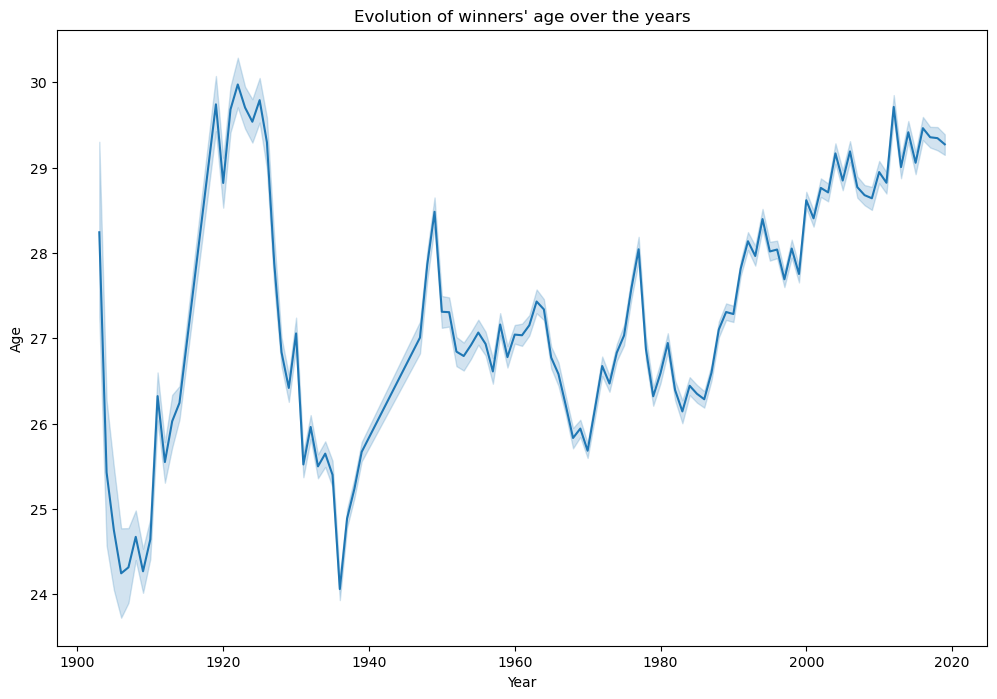

In [33]:
# Evolution of winners' ages over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=stage_data, x='year', y='age')
plt.title("Evolution of winners' age over the years")
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

# Correlation between different variables

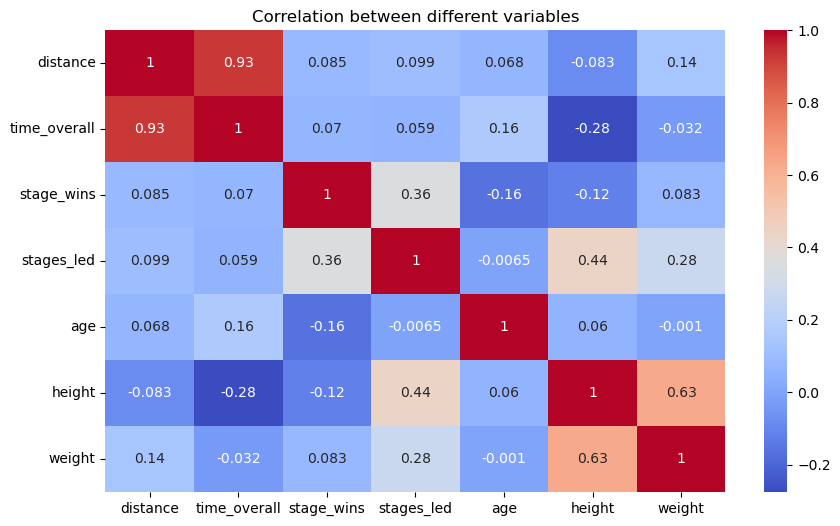

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(tdf_winners[['distance', 'time_overall', 'stage_wins', 'stages_led', 'age', 'height', 'weight']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between different variables')
plt.show()

# Analysis of stage data
We'll also explore stage data to see how distances, stage types and results have evolved.


## Distribution of stage distances

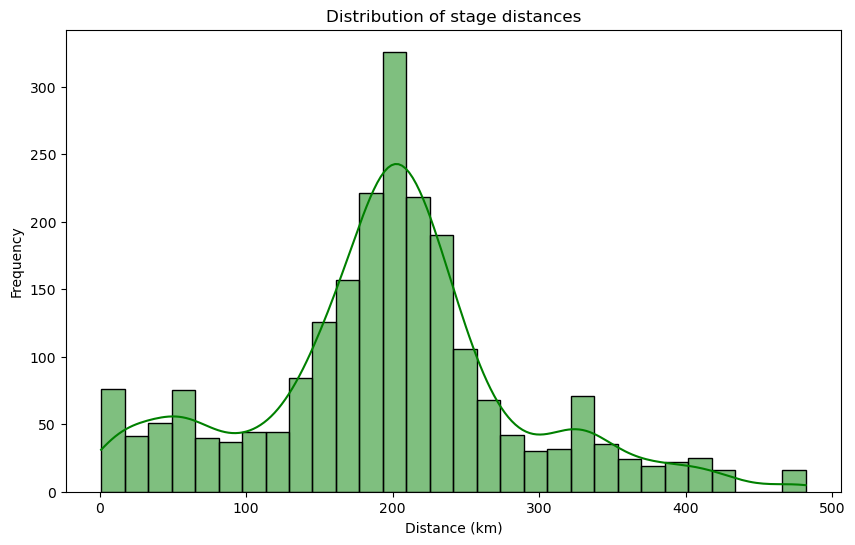

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(tdf_stages['Distance'], bins=30, kde=True, color='green')
plt.title('Distribution of stage distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

### Evolution of stage distances over time

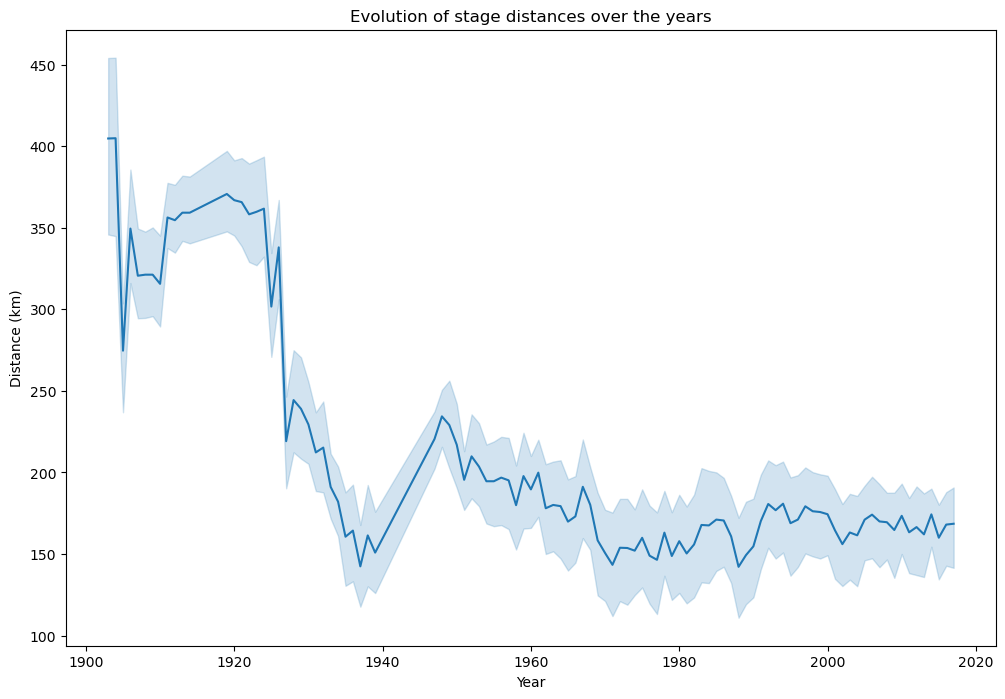

In [39]:
tdf_stages['year'] = pd.to_datetime(tdf_stages['Date']).dt.year
plt.figure(figsize=(12, 8))
sns.lineplot(data=tdf_stages, x='year', y='Distance')
plt.title('Evolution of stage distances over the years')
plt.xlabel('Year')
plt.ylabel('Distance (km)')
plt.show()

# Analyse des types d'étapes

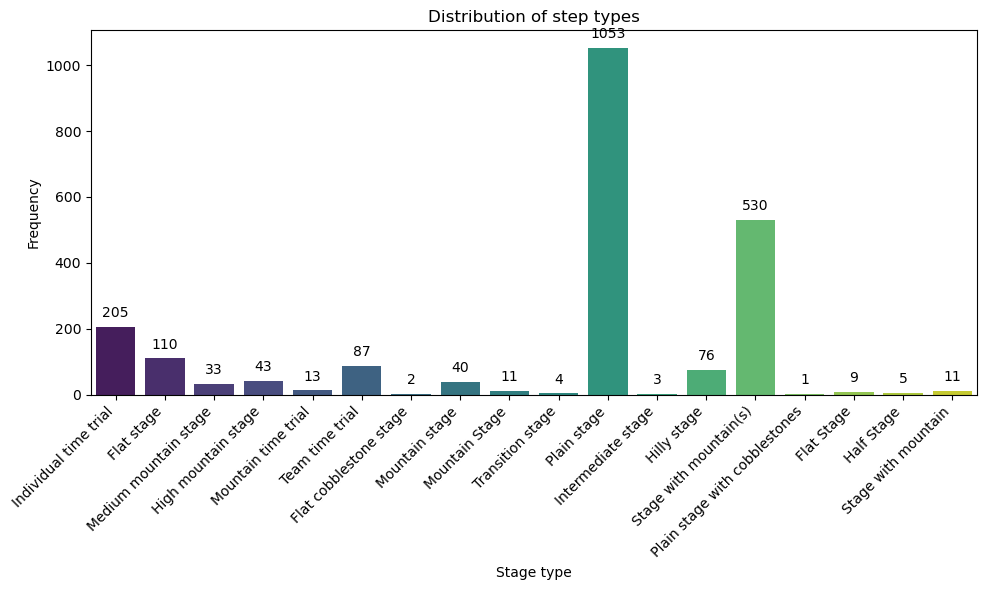

In [46]:
# Analysis of step types with values at the top of each bar
plt.figure(figsize=(10, 6))

# Create countplot
ax = sns.countplot(data=tdf_stages, x='Type', palette='viridis')

# Add values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Tilt labels on x axis

plt.xticks(rotation=45, ha='right')
# Axis title and labels
plt.title('Distribution of step types')
plt.xlabel('Stage type')
plt.ylabel('Frequency')
plt.tight_layout() # Adjusts layout to avoid overlaps
plt.show()

### 3. Data preparation for Machine Learning

Good data preparation is crucial to the success of Machine Learning models. This includes handling missing values, transforming data and creating new, relevant variables.

#### Data cleansing and transformation
First, we'll clean up the data by removing or filling in missing values and transforming time columns into a usable format.

### Winner data cleansing

In [167]:
print(tdf_winners_clean)
tdf_winners_clean = tdf_winners.dropna(subset=['winner_name', 'distance', 'time_overall'])
stage_data_clean = stage_data.dropna(subset=['rider', 'time'])

    edition  start_date     winner_name  winner_team  distance  time_overall  \
35       36  1949-06-30    Fausto Coppi        Italy    4808.0    149.680278   
38       39  1952-06-25    Fausto Coppi        Italy    4898.0    151.955556   
69       70  1983-07-01  Laurent Fignon  Renault–Elf    3809.0    105.131111   
70       71  1984-06-29  Laurent Fignon  Renault–Elf    4021.0    112.061111   

    time_margin  stage_wins  stages_led  height  ...  age        born  \
35     0.169444           3           5    1.77  ...   29  1919-09-15   
38     0.474444           5          14    1.77  ...   30  1919-09-15   
69     0.067778           1           6    1.74  ...   22  1960-08-12   
70     0.169444           5           7    1.74  ...   23  1960-08-12   

          died               full_name  \
35  1960-01-02     Angelo Fausto Coppi   
38  1960-01-02     Angelo Fausto Coppi   
69  2010-08-31  Laurent Patrick Fignon   
70  2010-08-31  Laurent Patrick Fignon   

                      

In [170]:
tdf_winners_clean['time_overall_seconds'] = tdf_winners_clean['time_overall']*3600
print(tdf_winners_clean['time_overall_seconds'])

0      340394.0
1      345955.0
10     712440.0
11     721728.0
12     832035.0
         ...   
101    305174.0
102    320688.0
103    310855.0
104    299833.0
105    298620.0
Name: time_overall_seconds, Length: 98, dtype: float64


C:\Users\adrien.lambert\AppData\Local\Temp\ipykernel_8696\3965863316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_winners_clean['time_overall_seconds'] = tdf_winners_clean['time_overall']*3600


In [85]:
# Feature engineering: création de nouvelles variables
tdf_winners_clean['year'] = pd.to_datetime(tdf_winners_clean['start_date']).dt.year
tdf_winners_clean = tdf_winners_clean.dropna()
# Vérification des valeurs manquantes
print(tdf_winners)

     edition  start_date          winner_name     winner_team  distance  \
0          1  1903-07-01        Maurice Garin    La Française    2428.0   
1          2  1904-07-02         Henri Cornet           Conte    2428.0   
2          3  1905-07-09    Louis Trousselier  Peugeot–Wolber    2994.0   
3          4  1906-07-04         René Pottier  Peugeot–Wolber    4637.0   
4          5  1907-07-08  Lucien Petit-Breton  Peugeot–Wolber    4488.0   
..       ...         ...                  ...             ...       ...   
101      102  2015-07-04         Chris Froome        Team Sky    3360.3   
102      103  2016-07-02         Chris Froome        Team Sky    3529.0   
103      104  2017-07-01         Chris Froome        Team Sky    3540.0   
104      105  2018-07-07       Geraint Thomas        Team Sky    3349.0   
105      106  2019-07-06          Egan Bernal      Team Ineos    3349.0   

     time_overall  time_margin  stage_wins  stages_led  height  weight  age  \
0       94.553889   

C:\Users\adrien.lambert\AppData\Local\Temp\ipykernel_8696\3934466471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_winners_clean['year'] = pd.to_datetime(tdf_winners_clean['start_date']).dt.year


#### Normalisation des Données
Certaines variables, telles que la distance et le temps, peuvent avoir des plages de valeurs très différentes. Nous allons normaliser ces variables pour améliorer les performances des modèles de Machine Learning.

In [171]:
from sklearn.preprocessing import StandardScaler

# Sélection des caractéristiques et de la cible
X = tdf_winners_clean[['distance', 'stage_wins', 'stages_led', 'age', 'height', 'weight']]
y = tdf_winners_clean['time_overall_seconds']

print(X)
print(y)
y_clean = y.dropna()

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification de la normalisation
print(pd.DataFrame(X_scaled, columns=X_clean.columns).describe())

     distance  stage_wins  stages_led  age  height  weight
0      2428.0           3           6   32    1.62    60.0
1      2428.0           1           3   19     NaN     NaN
10     5287.0           1           8   23     NaN     NaN
11     5380.0           1          15   24     NaN     NaN
12     5560.0           1           2   33     NaN     NaN
..        ...         ...         ...  ...     ...     ...
101    3360.3           1          16   30    1.86    69.0
102    3529.0           2          14   31    1.86    69.0
103    3540.0           0          15   32    1.86    69.0
104    3349.0           2          11   32    1.83    71.0
105    3349.0           0           2   22    1.75    60.0

[98 rows x 6 columns]
0      340394.0
1      345955.0
10     712440.0
11     721728.0
12     832035.0
         ...   
101    305174.0
102    320688.0
103    310855.0
104    299833.0
105    298620.0
Name: time_overall_seconds, Length: 98, dtype: float64
           distance    stage_wins  sta

### 4. Modélisation et Prédiction

Nous allons utiliser plusieurs modèles de Machine Learning pour prédire le temps total d'un gagnant en fonction des caractéristiques disponibles.


#### Régression Linéaire
Nous commencerons par un modèle de régression linéaire simple.

Dans ce projet, nous utilisons différents modèles de machine learning pour prédire le temps total (`time_overall`) qu'il faut au vainqueur du Tour de France pour compléter la course, converti en secondes (`time_overall_seconds`).

### Objectif de la Prédiction

Le but est de développer des modèles capables de prédire ce temps total basé sur certaines caractéristiques des vainqueurs et de la course. Ces caractéristiques incluent :

- **distance** : La distance totale parcourue pendant le Tour.
- **stage_wins** : Le nombre de victoires d'étape.
- **stages_led** : Le nombre de jours passés en tant que leader de la course.
- **age** : L'âge du vainqueur.
- **height** : La taille du vainqueur.
- **weight** : Le poids du vainqueur.

### Pourquoi prédire le temps total ?

1. **Analyse de la Performance** : Comprendre quels facteurs influencent le plus le temps total nécessaire pour gagner le Tour de France. Cela peut fournir des informations précieuses aux équipes et aux cyclistes pour optimiser leur entraînement et leur stratégie.
 
2. **Prévisions** : En utilisant les données des éditions passées, nous pouvons essayer de prédire combien de temps prendra le vainqueur de l'édition actuelle ou future du Tour de France, en fonction des caractéristiques connues à l'avance (comme la distance totale et les caractéristiques physiques du coureur).

3. **Comparaison des Modèles** : Tester et comparer différents algorithmes de machine learning (Régression Linéaire, Forêt Aléatoire, Réseau de Neurones Multi-couches) pour voir lequel fonctionne le mieux pour ce type de données. Cela aide à déterminer quel modèle offre les meilleures performances et peut être utilisé pour des prédictions plus fiables.

### Analyse de la Performance des Modèles

Pour évaluer la performance des modèles, nous utilisons deux métriques principales :

1. **Mean Absolute Error (MAE)** : Cette métrique mesure l'erreur moyenne entre les valeurs prédites et les valeurs réelles en termes absolus. Plus le MAE est bas, plus les prédictions sont précises.

2. **R² (coefficient de détermination)** : Cette métrique indique la proportion de la variance de la variable dépendante (temps total) qui est prévisible à partir des variables indépendantes (caractéristiques). Un R² plus proche de 1 indique un modèle qui explique bien la variance des données.

### Résultats Attendus

En utilisant ces modèles, nous cherchons à déterminer :
- Quelle est la précision de chaque modèle pour prédire le temps total.
- Quels facteurs (distance, nombre de victoires d'étape, etc.) ont le plus d'impact sur le temps total du vainqueur.
- Comment les différents modèles se comparent les uns aux autres en termes de performance.

### Conclusion

Ce projet vise à comprendre les dynamiques du Tour de France en termes de performance des vainqueurs et à tester l'efficacité de divers modèles de machine learning pour prédire des résultats sportifs basés sur des caractéristiques mesurables. Les résultats peuvent offrir des perspectives intéressantes pour des analyses futures et des applications pratiques dans l'entraînement et la stratégie des équipes cyclistes.

In [172]:
# Verif des premieres lignes de X_scaled
print("Premieres lignes de X_scaled")
print(X_scaled.shape)
print(X_scaled)

Premieres lignes de X_scaled
(98, 6)
[[-2.52475484  0.20117069 -0.89825584  1.22065377 -2.78597567 -1.45393557]
 [-2.52475484 -0.89409197 -1.45540187 -2.75661707         nan         nan]
 [ 1.5866728  -0.89409197 -0.52682516 -1.53284143         nan         nan]
 [ 1.72041284 -0.89409197  0.77318225 -1.22689752         nan         nan]
 [ 1.97926453 -0.89409197 -1.64111722  1.52659768         nan         nan]
 [ 1.89729483  0.74880202  0.5874669   0.60876594         nan         nan]
 [ 1.87140966 -0.34646064  0.5874669   1.52659768         nan         nan]
 [ 1.71322252 -1.4417233  -1.45540187  2.44442941         nan         nan]
 [ 1.72904123  0.20117069 -0.89825584  1.83254159         nan         nan]
 [ 1.78512576  0.74880202  0.77318225  0.30282203         nan         nan]
 [ 1.80669674  0.74880202  0.40175156  0.60876594         nan         nan]
 [ 2.24530654 -0.34646064 -0.52682516  1.52659768         nan         nan]
 [ 1.74629801  0.20117069  0.5874669  -0.30906579         nan  

In [173]:
# Verif des premieres lignes de y
print("Premieres lignes de y")
print(y.shape)

Premieres lignes de y
(98,)


In [174]:
import numpy as np
X_scaled = np.nan_to_num(X_scaled, nan=0)
y = np.nan_to_num(y, nan=0)
print(X_scaled)

[[-2.52475484  0.20117069 -0.89825584  1.22065377 -2.78597567 -1.45393557]
 [-2.52475484 -0.89409197 -1.45540187 -2.75661707  0.          0.        ]
 [ 1.5866728  -0.89409197 -0.52682516 -1.53284143  0.          0.        ]
 [ 1.72041284 -0.89409197  0.77318225 -1.22689752  0.          0.        ]
 [ 1.97926453 -0.89409197 -1.64111722  1.52659768  0.          0.        ]
 [ 1.89729483  0.74880202  0.5874669   0.60876594  0.          0.        ]
 [ 1.87140966 -0.34646064  0.5874669   1.52659768  0.          0.        ]
 [ 1.71322252 -1.4417233  -1.45540187  2.44442941  0.          0.        ]
 [ 1.72904123  0.20117069 -0.89825584  1.83254159  0.          0.        ]
 [ 1.78512576  0.74880202  0.77318225  0.30282203  0.          0.        ]
 [ 1.80669674  0.74880202  0.40175156  0.60876594  0.          0.        ]
 [ 2.24530654 -0.34646064 -0.52682516  1.52659768  0.          0.        ]
 [ 1.74629801  0.20117069  0.5874669  -0.30906579  0.          0.        ]
 [ 1.85846708  1.29643336

In [175]:
# Vérifiez que les données ne sont pas None
if X_scaled is None or y_clean is None:
    raise ValueError("Les données X et y ne peuvent pas être None.")

# Affichez les données pour vérification
print("X:")
print(X_scaled)
print("\ny:")
print(y_clean)

# Vérifiez les dimensions des données
print("\nDimensions de X:", X_scaled.shape)
print("Dimensions de y:", y_clean.shape)

X:
[[-2.52475484  0.20117069 -0.89825584  1.22065377 -2.78597567 -1.45393557]
 [-2.52475484 -0.89409197 -1.45540187 -2.75661707  0.          0.        ]
 [ 1.5866728  -0.89409197 -0.52682516 -1.53284143  0.          0.        ]
 [ 1.72041284 -0.89409197  0.77318225 -1.22689752  0.          0.        ]
 [ 1.97926453 -0.89409197 -1.64111722  1.52659768  0.          0.        ]
 [ 1.89729483  0.74880202  0.5874669   0.60876594  0.          0.        ]
 [ 1.87140966 -0.34646064  0.5874669   1.52659768  0.          0.        ]
 [ 1.71322252 -1.4417233  -1.45540187  2.44442941  0.          0.        ]
 [ 1.72904123  0.20117069 -0.89825584  1.83254159  0.          0.        ]
 [ 1.78512576  0.74880202  0.77318225  0.30282203  0.          0.        ]
 [ 1.80669674  0.74880202  0.40175156  0.60876594  0.          0.        ]
 [ 2.24530654 -0.34646064 -0.52682516  1.52659768  0.          0.        ]
 [ 1.74629801  0.20117069  0.5874669  -0.30906579  0.          0.        ]
 [ 1.85846708  1.29643

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [177]:
# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R^2: {r2}')

MAE: 46285.43457299359
R^2: 0.7805447459122443


              Coefficient
distance    143839.645618
stage_wins     950.111550
stages_led   -6531.510118
age           1815.023686
height        7031.579216
weight       -8439.338095


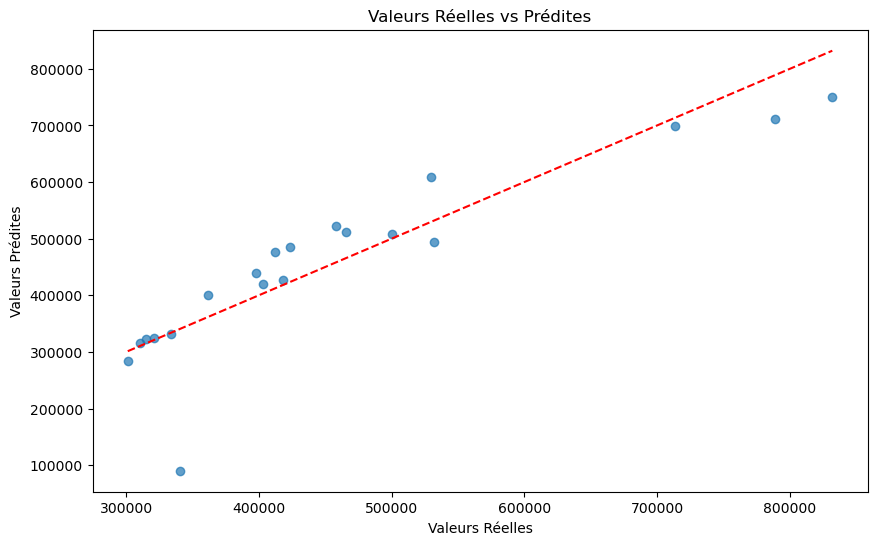

In [178]:
# Afficher les coefficients du modèle
coefficients = pd.DataFrame(model.coef_.reshape(-1,1), X.columns, columns=['Coefficient'])
print(coefficients)

# Graphique des valeurs prédites vs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Prédites')
plt.show()

#### Modèles Avancés : Forêt Aléatoire et Réseaux de Neurones
Nous allons également explorer des modèles plus complexes tels que les forêts aléatoires et les réseaux de neurones pour améliorer nos prédictions.

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Modèle de Forêt Aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle de Forêt Aléatoire
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Forêt Aléatoire MAE: {mae_rf}')
print(f'Forêt Aléatoire R^2: {r2_rf}')

Forêt Aléatoire MAE: 21304.639000000025
Forêt Aléatoire R^2: 0.9665721912809725


In [180]:
# Modèle de Réseau de Neurones Multi-couches (MLP)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Évaluation du modèle de Réseau de Neurones Multi-couches
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'Reseau de Neurones MAE: {mae_mlp}')
print(f'Reseau de Neurones R^2: {r2_mlp}')

Reseau de Neurones MAE: 457716.1454850862
Reseau de Neurones R^2: -9.051132530544455


C:\Users\adrien.lambert\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


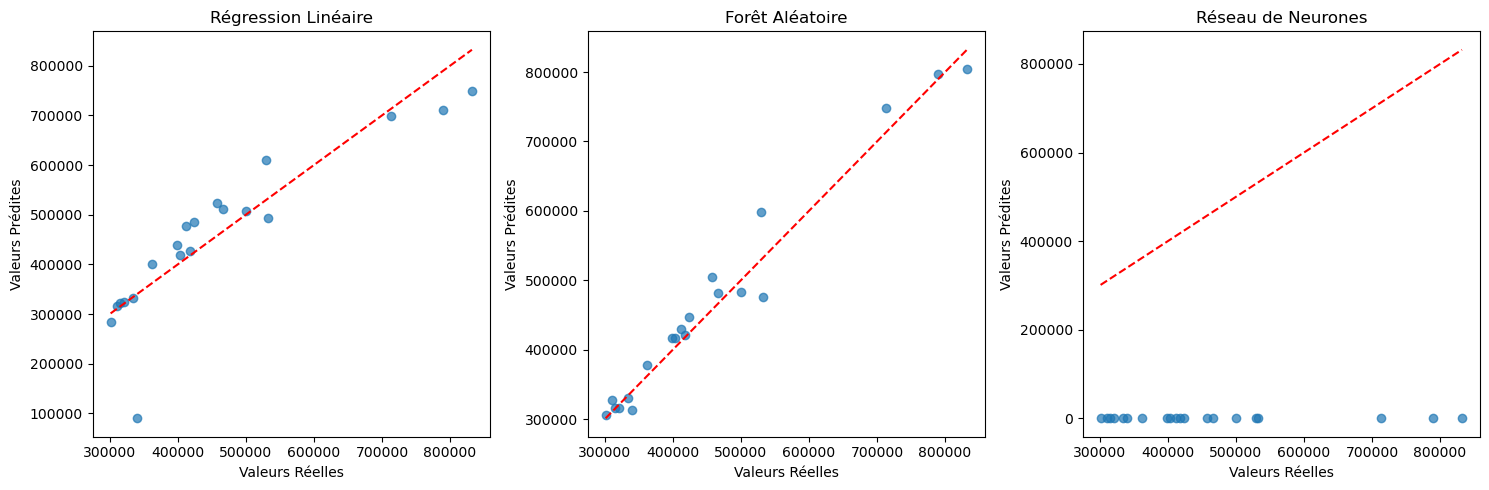

In [181]:
# Graphique des valeurs prédites vs réelles pour tous les modèles
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Régression Linéaire')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Forêt Aléatoire')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_mlp, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Réseau de Neurones')

plt.tight_layout()
plt.show()